In [1]:
library(ggplot2)
library(lattice)
library(caret)

In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [3]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [4]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]
# Convert the Species column to a factor
dataset$Species <- as.factor(dataset$Species)
# List the levels of the Species column
levels(dataset$Species)

Warning message in createDataPartition(dataset$Species, p = 0.8, list = FALSE):
“Some classes have a single record ( name ) and these will be selected for the sample”


[1] "name"       "setosa"     "versicolor" "virginica"

In [5]:
# dimensions of dataset
dim(dataset)

[1] 121   5

In [6]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
 "character"  "character"  "character"  "character"     "factor"

In [7]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<chr>,<chr>,<chr>,<chr>,<fct>
1,sepal_length,sepal_width,petal_length,petal_width,name
2,5.1,3.5,1.4,0.2,setosa
3,4.9,3.0,1.4,0.2,setosa
4,4.7,3.2,1.3,0.2,setosa
5,4.6,3.1,1.5,0.2,setosa
7,5.4,3.9,1.7,0.4,setosa


In [8]:
# list the levels for the class
levels(dataset$Species)

[1] "name"       "setosa"     "versicolor" "virginica"

In [9]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
name,1,0.8264463
setosa,40,33.0578512
versicolor,40,33.0578512
virginica,40,33.0578512


In [11]:
# summarize attribute distributions: perform summary on numeric columns only
numeric_columns <- sapply(iris, is.numeric)
summary(iris[, numeric_columns])


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [16]:
# Visualize Dataset
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

Species is not numeric and will be skipped


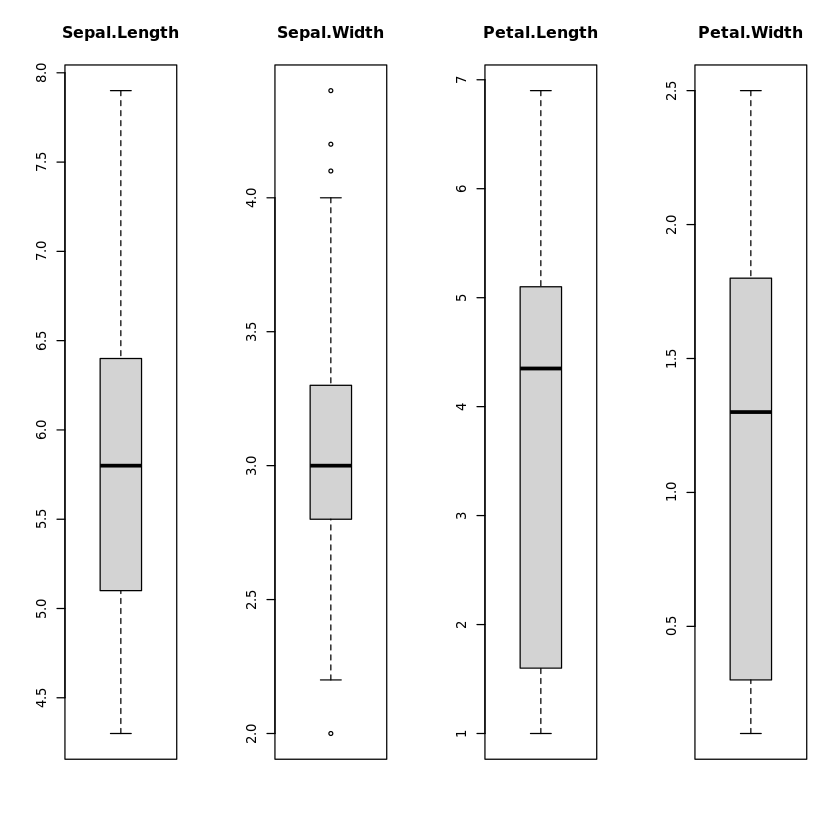

In [15]:
# boxplot for each attribute on one image
par(mfrow = c(1, 4))
for (i in 1:ncol(iris)) {
  if (is.numeric(iris[, i])) {
    boxplot(iris[, i], main = names(iris)[i])
  } else {
    cat(names(iris)[i], "is not numeric and will be skipped\n")
  }
}

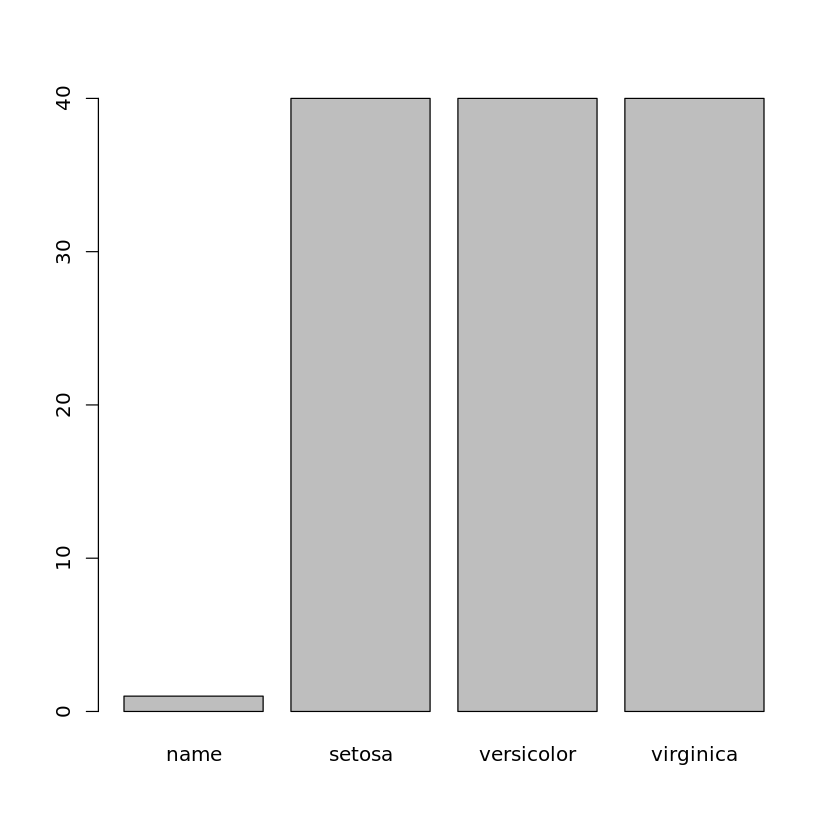

In [17]:
# barplot for class breakdown
plot(y)

ERROR while rich displaying an object: Error in grid.Call.graphics(C_downviewport, name$name, strict): Viewport 'plot_01.panel.1.1.off.vp' was not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](

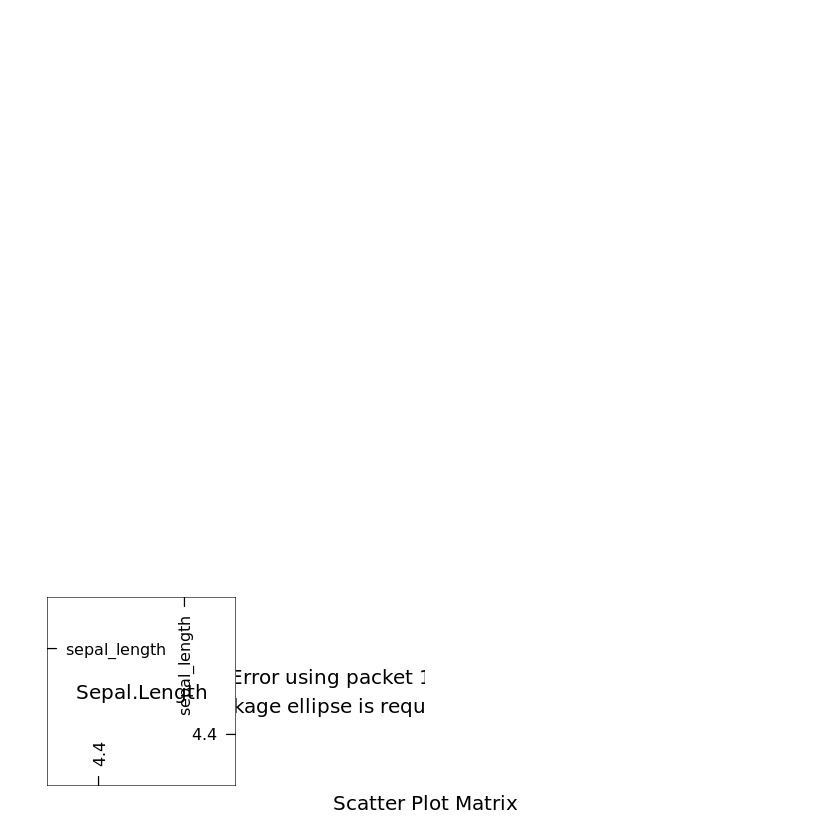

In [18]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")